<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#No-qualifications" data-toc-modified-id="No-qualifications-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>No qualifications</a></span></li><li><span><a href="#Level-1-and-entry-level-qualifications:" data-toc-modified-id="Level-1-and-entry-level-qualifications:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Level 1 and entry level qualifications:</a></span></li><li><span><a href="#Level-2-qualifications" data-toc-modified-id="Level-2-qualifications-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Level 2 qualifications</a></span></li><li><span><a href="#Apprenticeship" data-toc-modified-id="Apprenticeship-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Apprenticeship</a></span></li><li><span><a href="#Level-3" data-toc-modified-id="Level-3-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Level 3</a></span></li><li><span><a href="#Level-4" data-toc-modified-id="Level-4-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Level 4</a></span></li><li><span><a href="#Other" data-toc-modified-id="Other-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Other</a></span></li></ul></div>

In [1]:
import pandas as pd

In [2]:
he_gi = pd.read_csv('/Users/loucap/Documents/GitWork/InteractiveGender/Data/highedu_gi.csv')

In [3]:
he_gi.head()

,Lower tier local authorities Code,Lower tier local authorities,Gender identity (7 categories) Code,Gender identity (7 categories),Highest level of qualification (8 categories) Code,Highest level of qualification (8 categories),Observation
0,E06000001,Hartlepool,-8,Does not apply,-8,Does not apply,0
1,E06000001,Hartlepool,-8,Does not apply,0,No qualifications,0
2,E06000001,Hartlepool,-8,Does not apply,1,Level 1 and entry level qualifications: 1 to 4...,0
3,E06000001,Hartlepool,-8,Does not apply,2,Level 2 qualifications: 5 or more GCSEs (A* to...,0
4,E06000001,Hartlepool,-8,Does not apply,3,Apprenticeship,0


In [4]:
he_gi.rename(columns={'Lower tier local authorities Code':'LA_code', 'Lower tier local authorities':'LA_name', 'Gender identity (7 categories) Code': 'GI_code', 'Gender identity (7 categories)': 'GI_categories', 'Highest level of qualification (8 categories) Code': 'HLE_code', 'Highest level of qualification (8 categories)': 'HLE_categories'}, inplace=True)

In [5]:
# Subset to get rid of irrelevant GI categories

he = he_gi[(he_gi['GI_code'] != -8) & (he_gi['HLE_code'] != -8)]

In [6]:
he.head()

,LA_code,LA_name,GI_code,GI_categories,HLE_code,HLE_categories,Observation
9,E06000001,Hartlepool,1,Gender identity the same as sex registered at ...,0,No qualifications,15799
10,E06000001,Hartlepool,1,Gender identity the same as sex registered at ...,1,Level 1 and entry level qualifications: 1 to 4...,6744
11,E06000001,Hartlepool,1,Gender identity the same as sex registered at ...,2,Level 2 qualifications: 5 or more GCSEs (A* to...,10465
12,E06000001,Hartlepool,1,Gender identity the same as sex registered at ...,3,Apprenticeship,4888
13,E06000001,Hartlepool,1,Gender identity the same as sex registered at ...,4,Level 3 qualifications: 2 or more A levels or ...,13230


In [7]:
# Let's calculate our percentages... 

he['Percentages'] = ''

for i in he.LA_name.unique():
    
    b = he[he['LA_name'] == i]
    
    perc = b.Observation / b.Observation.sum() * 100
    
    he.loc[b.index, 'Percentages'] = round(perc, 2)

/var/folders/82/8svymys93qv3p2bzp21s9rsc0000gn/T/ipykernel_9715/3950922124.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  he['Percentages'] = ''


In [8]:
he['Total_LA_counts'] = ''

for i in he.LA_name.unique():
    
    b = he[he.LA_name == i]
    
    tot = b.Observation.sum()
    
    he.loc[b.index, 'Total_LA_counts'] = tot

/var/folders/82/8svymys93qv3p2bzp21s9rsc0000gn/T/ipykernel_9715/4054964020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  he['Total_LA_counts'] = ''


# No qualifications

In [9]:
no_qual = he[(he.HLE_categories == 'No qualifications')]
no_qual.head()

,LA_code,LA_name,GI_code,GI_categories,HLE_code,HLE_categories,Observation,Percentages,Total_LA_counts
9,E06000001,Hartlepool,1,Gender identity the same as sex registered at ...,0,No qualifications,15799,21.15,74686
17,E06000001,Hartlepool,2,Gender identity different from sex registered ...,0,No qualifications,70,0.09,74686
25,E06000001,Hartlepool,3,Trans woman,0,No qualifications,10,0.01,74686
33,E06000001,Hartlepool,4,Trans man,0,No qualifications,11,0.01,74686
41,E06000001,Hartlepool,5,All other gender identities,0,No qualifications,2,0.0,74686


In [10]:
no_qual['No_qual_perc'] = ''

for i in no_qual.LA_code.unique():
    
    v = no_qual[no_qual.LA_code == i]
    
    perc = v.Percentages.sum()
    
    no_qual.loc[v.index, 'No_qual_perc'] = perc

/var/folders/82/8svymys93qv3p2bzp21s9rsc0000gn/T/ipykernel_9715/2862366980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_qual['No_qual_perc'] = ''


In [11]:
no_qual.head()

,LA_code,LA_name,GI_code,GI_categories,HLE_code,HLE_categories,Observation,Percentages,Total_LA_counts,No_qual_perc
9,E06000001,Hartlepool,1,Gender identity the same as sex registered at ...,0,No qualifications,15799,21.15,74686,23.13
17,E06000001,Hartlepool,2,Gender identity different from sex registered ...,0,No qualifications,70,0.09,74686,23.13
25,E06000001,Hartlepool,3,Trans woman,0,No qualifications,10,0.01,74686,23.13
33,E06000001,Hartlepool,4,Trans man,0,No qualifications,11,0.01,74686,23.13
41,E06000001,Hartlepool,5,All other gender identities,0,No qualifications,2,0.0,74686,23.13


In [12]:
non_ans = no_qual[no_qual.GI_categories == 'Not answered']

In [13]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]
# p1.legend.location = "bottom_right"
# p1.legend.click_policy="hide"
# p1.legend.title = "Regions"

# regions = df.region_x.unique()
# urban = df.Urb_Rur.unique()


p2 = figure(title="Relationship between % those with no qualifications in given LA, and their Non-response rate", y_axis_label="Non-response Rate", x_axis_label="Percentage of those with no qualifications", tooltips = tool)
# output_notebook()

p2.scatter("No_qual_perc", "Percentages", source = non_ans, fill_alpha = 0.5, size = 10)

show(p2)

In [14]:
he.HLE_categories.unique()

array(['No qualifications',
       'Level 1 and entry level qualifications: 1 to 4 GCSEs grade A* to C, Any GCSEs at other grades, O levels or CSEs (any grades), 1 AS level, NVQ level 1, Foundation GNVQ, Basic or Essential Skills',
       'Level 2 qualifications: 5 or more GCSEs (A* to C or 9 to 4), O levels (passes), CSEs (grade 1), School Certification, 1 A level, 2 to 3 AS levels, VCEs, Intermediate or Higher Diploma, Welsh Baccalaureate Intermediate Diploma, NVQ level 2, Intermediate GNVQ, City and Guilds Craft, BTEC First or General Diploma, RSA Diploma',
       'Apprenticeship',
       'Level 3 qualifications: 2 or more A levels or VCEs, 4 or more AS levels, Higher School Certificate, Progression or Advanced Diploma, Welsh Baccalaureate Advance Diploma, NVQ level 3; Advanced GNVQ, City and Guilds Advanced Craft, ONC, OND, BTEC National, RSA Advanced Diploma',
       'Level 4 qualifications or above: degree (BA, BSc), higher degree (MA, PhD, PGCE), NVQ level 4 to 5, HNC, HND, RSA 

# Level 1 and entry level qualifications:



In [15]:
level_1 = he[(he.HLE_categories == 'Level 1 and entry level qualifications: 1 to 4 GCSEs grade A* to C, Any GCSEs at other grades, O levels or CSEs (any grades), 1 AS level, NVQ level 1, Foundation GNVQ, Basic or Essential Skills')]
level_1.head()

,LA_code,LA_name,GI_code,GI_categories,HLE_code,HLE_categories,Observation,Percentages,Total_LA_counts
10,E06000001,Hartlepool,1,Gender identity the same as sex registered at ...,1,Level 1 and entry level qualifications: 1 to 4...,6744,9.03,74686
18,E06000001,Hartlepool,2,Gender identity different from sex registered ...,1,Level 1 and entry level qualifications: 1 to 4...,8,0.01,74686
26,E06000001,Hartlepool,3,Trans woman,1,Level 1 and entry level qualifications: 1 to 4...,4,0.01,74686
34,E06000001,Hartlepool,4,Trans man,1,Level 1 and entry level qualifications: 1 to 4...,3,0.0,74686
42,E06000001,Hartlepool,5,All other gender identities,1,Level 1 and entry level qualifications: 1 to 4...,1,0.0,74686


In [16]:
level_1['level_1_perc'] = ''

for i in level_1.LA_code.unique():
    
    v = level_1[level_1.LA_code == i]
    
    perc = v.Percentages.sum()
    
    level_1.loc[v.index, 'level_1_perc'] = perc

/var/folders/82/8svymys93qv3p2bzp21s9rsc0000gn/T/ipykernel_9715/1257687349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  level_1['level_1_perc'] = ''


In [17]:
non_ans2 = level_1[level_1.GI_categories == 'Not answered']

In [18]:
non_ans2

,LA_code,LA_name,GI_code,GI_categories,HLE_code,HLE_categories,Observation,Percentages,Total_LA_counts,level_1_perc
50,E06000001,Hartlepool,6,Not answered,1,Level 1 and entry level qualifications: 1 to 4...,316,0.42,74686,9.47
106,E06000002,Middlesbrough,6,Not answered,1,Level 1 and entry level qualifications: 1 to 4...,723,0.63,113937,9.84
162,E06000003,Redcar and Cleveland,6,Not answered,1,Level 1 and entry level qualifications: 1 to 4...,464,0.41,112341,9.77
218,E06000004,Stockton-on-Tees,6,Not answered,1,Level 1 and entry level qualifications: 1 to 4...,732,0.46,158010,9.69
274,E06000005,Darlington,6,Not answered,1,Level 1 and entry level qualifications: 1 to 4...,325,0.37,88112,9.4
...,...,...,...,...,...,...,...,...,...,...
18306,W06000020,Torfaen,6,Not answered,1,Level 1 and entry level qualifications: 1 to 4...,429,0.57,75112,10.25
18362,W06000021,Monmouthshire,6,Not answered,1,Level 1 and entry level qualifications: 1 to 4...,308,0.39,78236,8.25
18418,W06000022,Newport,6,Not answered,1,Level 1 and entry level qualifications: 1 to 4...,701,0.55,127422,9.21
18474,W06000023,Powys,6,Not answered,1,Level 1 and entry level qualifications: 1 to 4...,596,0.53,112540,8.61


In [81]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]
# p1.legend.location = "bottom_right"
# p1.legend.click_policy="hide"
# p1.legend.title = "Regions"

# regions = df.region_x.unique()
# urban = df.Urb_Rur.unique()


p2 = figure(title="Relationship between % those with no qualifications in given LA, and their Non-response rate", y_axis_label="Non-response Rate", x_axis_label="Percentage of those with no qualifications", tooltips = tool)
# output_notebook()

p2.scatter("level_1_perc", "Percentages", source = non_ans2, fill_alpha = 0.5, size = 10)

show(p2)

# Level 2 qualifications

In [20]:
level_2 = he[(he.HLE_categories == 'Level 2 qualifications: 5 or more GCSEs (A* to C or 9 to 4), O levels (passes), CSEs (grade 1), School Certification, 1 A level, 2 to 3 AS levels, VCEs, Intermediate or Higher Diploma, Welsh Baccalaureate Intermediate Diploma, NVQ level 2, Intermediate GNVQ, City and Guilds Craft, BTEC First or General Diploma, RSA Diploma')]
level_2.head()

,LA_code,LA_name,GI_code,GI_categories,HLE_code,HLE_categories,Observation,Percentages,Total_LA_counts
11,E06000001,Hartlepool,1,Gender identity the same as sex registered at ...,2,Level 2 qualifications: 5 or more GCSEs (A* to...,10465,14.01,74686
19,E06000001,Hartlepool,2,Gender identity different from sex registered ...,2,Level 2 qualifications: 5 or more GCSEs (A* to...,18,0.02,74686
27,E06000001,Hartlepool,3,Trans woman,2,Level 2 qualifications: 5 or more GCSEs (A* to...,10,0.01,74686
35,E06000001,Hartlepool,4,Trans man,2,Level 2 qualifications: 5 or more GCSEs (A* to...,9,0.01,74686
43,E06000001,Hartlepool,5,All other gender identities,2,Level 2 qualifications: 5 or more GCSEs (A* to...,7,0.01,74686


In [21]:
level_2['level_2_perc'] = ''

for i in level_2.LA_code.unique():
    
    v = level_2[level_2.LA_code == i]
    
    perc = v.Percentages.sum()
    
    level_2.loc[v.index, 'level_2_perc'] = perc

/var/folders/82/8svymys93qv3p2bzp21s9rsc0000gn/T/ipykernel_9715/4237010343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  level_2['level_2_perc'] = ''


In [22]:
non_ans3 = level_2[level_2.GI_categories == 'Not answered']

In [79]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]
# p1.legend.location = "bottom_right"
# p1.legend.click_policy="hide"
# p1.legend.title = "Regions"

# regions = df.region_x.unique()
# urban = df.Urb_Rur.unique()


p2 = figure(title="Relationship between % those with no qualifications in given LA, and their Non-response rate", y_axis_label="Non-response Rate", x_axis_label="Percentage of those with no qualifications", tooltips = tool)
# output_notebook()

p2.scatter("level_2_perc", "Percentages", source = non_ans3, fill_alpha = 0.5, size = 10)

show(p2)

# Apprenticeship

In [24]:
appr = he[(he.HLE_categories == 'Apprenticeship')]
appr.head()

,LA_code,LA_name,GI_code,GI_categories,HLE_code,HLE_categories,Observation,Percentages,Total_LA_counts
12,E06000001,Hartlepool,1,Gender identity the same as sex registered at ...,3,Apprenticeship,4888,6.54,74686
20,E06000001,Hartlepool,2,Gender identity different from sex registered ...,3,Apprenticeship,10,0.01,74686
28,E06000001,Hartlepool,3,Trans woman,3,Apprenticeship,3,0.0,74686
36,E06000001,Hartlepool,4,Trans man,3,Apprenticeship,3,0.0,74686
44,E06000001,Hartlepool,5,All other gender identities,3,Apprenticeship,1,0.0,74686


In [25]:
appr['appr_perc'] = ''

for i in appr.LA_code.unique():
    
    v = appr[appr.LA_code == i]
    
    perc = v.Percentages.sum()
    
    appr.loc[v.index, 'appr_perc'] = perc

/var/folders/82/8svymys93qv3p2bzp21s9rsc0000gn/T/ipykernel_9715/1792295549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appr['appr_perc'] = ''


In [26]:
non_ans4 = appr[appr.GI_categories == 'Not answered']

In [27]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]
# p1.legend.location = "bottom_right"
# p1.legend.click_policy="hide"
# p1.legend.title = "Regions"

# regions = df.region_x.unique()
# urban = df.Urb_Rur.unique()


p2 = figure(title="Relationship between % those with no qualifications in given LA, and their Non-response rate", y_axis_label="Non-response Rate", x_axis_label="Percentage of those with no qualifications", tooltips = tool)
# output_notebook()

p2.scatter("appr_perc", "Percentages", source = non_ans4, fill_alpha = 0.5, size = 10)

show(p2)

# Level 3

In [28]:
level_3 = he[(he.HLE_categories == 'Level 3 qualifications: 2 or more A levels or VCEs, 4 or more AS levels, Higher School Certificate, Progression or Advanced Diploma, Welsh Baccalaureate Advance Diploma, NVQ level 3; Advanced GNVQ, City and Guilds Advanced Craft, ONC, OND, BTEC National, RSA Advanced Diploma')]
level_3.head()

,LA_code,LA_name,GI_code,GI_categories,HLE_code,HLE_categories,Observation,Percentages,Total_LA_counts
13,E06000001,Hartlepool,1,Gender identity the same as sex registered at ...,4,Level 3 qualifications: 2 or more A levels or ...,13230,17.71,74686
21,E06000001,Hartlepool,2,Gender identity different from sex registered ...,4,Level 3 qualifications: 2 or more A levels or ...,17,0.02,74686
29,E06000001,Hartlepool,3,Trans woman,4,Level 3 qualifications: 2 or more A levels or ...,8,0.01,74686
37,E06000001,Hartlepool,4,Trans man,4,Level 3 qualifications: 2 or more A levels or ...,6,0.01,74686
45,E06000001,Hartlepool,5,All other gender identities,4,Level 3 qualifications: 2 or more A levels or ...,18,0.02,74686


In [29]:
level_3['level_3_perc'] = ''

for i in level_3.LA_code.unique():
    
    v = level_3[level_3.LA_code == i]
    
    perc = v.Percentages.sum()
    
    level_3.loc[v.index, 'level_3_perc'] = perc

/var/folders/82/8svymys93qv3p2bzp21s9rsc0000gn/T/ipykernel_9715/577186689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  level_3['level_3_perc'] = ''


In [30]:
non_ans5 = level_3[level_3.GI_categories == 'Not answered']

In [82]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]
# p1.legend.location = "bottom_right"
# p1.legend.click_policy="hide"
# p1.legend.title = "Regions"

# regions = df.region_x.unique()
# urban = df.Urb_Rur.unique()


p2 = figure(title="Relationship between % those with no qualifications in given LA, and their Non-response rate", y_axis_label="Non-response Rate", x_axis_label="Percentage of those with no qualifications", tooltips = tool)
# output_notebook()

p2.scatter("level_3_perc", "Percentages", source = non_ans5, fill_alpha = 0.5, size = 10)

show(p2)

# Level 4

In [32]:
level_4 = he[(he.HLE_categories == 'Level 4 qualifications or above: degree (BA, BSc), higher degree (MA, PhD, PGCE), NVQ level 4 to 5, HNC, HND, RSA Higher Diploma, BTEC Higher level, professional qualifications (for example, teaching, nursing, accountancy)')]
level_4.head()

,LA_code,LA_name,GI_code,GI_categories,HLE_code,HLE_categories,Observation,Percentages,Total_LA_counts
14,E06000001,Hartlepool,1,Gender identity the same as sex registered at ...,5,"Level 4 qualifications or above: degree (BA, B...",17757,23.78,74686
22,E06000001,Hartlepool,2,Gender identity different from sex registered ...,5,"Level 4 qualifications or above: degree (BA, B...",36,0.05,74686
30,E06000001,Hartlepool,3,Trans woman,5,"Level 4 qualifications or above: degree (BA, B...",13,0.02,74686
38,E06000001,Hartlepool,4,Trans man,5,"Level 4 qualifications or above: degree (BA, B...",17,0.02,74686
46,E06000001,Hartlepool,5,All other gender identities,5,"Level 4 qualifications or above: degree (BA, B...",25,0.03,74686


In [33]:
level_4['level_4_perc'] = ''

for i in level_4.LA_code.unique():
    
    v = level_4[level_4.LA_code == i]
    
    perc = v.Percentages.sum()
    
    level_4.loc[v.index, 'level_4_perc'] = perc

/var/folders/82/8svymys93qv3p2bzp21s9rsc0000gn/T/ipykernel_9715/1282712653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  level_4['level_4_perc'] = ''


In [34]:
non_ans6 = level_4[level_4.GI_categories == 'Not answered']

In [35]:
non_ans6

,LA_code,LA_name,GI_code,GI_categories,HLE_code,HLE_categories,Observation,Percentages,Total_LA_counts,level_4_perc
54,E06000001,Hartlepool,6,Not answered,5,"Level 4 qualifications or above: degree (BA, B...",678,0.91,74686,24.81
110,E06000002,Middlesbrough,6,Not answered,5,"Level 4 qualifications or above: degree (BA, B...",1419,1.25,113937,26.44
166,E06000003,Redcar and Cleveland,6,Not answered,5,"Level 4 qualifications or above: degree (BA, B...",1101,0.98,112341,24.93
222,E06000004,Stockton-on-Tees,6,Not answered,5,"Level 4 qualifications or above: degree (BA, B...",1663,1.05,158010,29.52
278,E06000005,Darlington,6,Not answered,5,"Level 4 qualifications or above: degree (BA, B...",945,1.07,88112,28.95
...,...,...,...,...,...,...,...,...,...,...
18310,W06000020,Torfaen,6,Not answered,5,"Level 4 qualifications or above: degree (BA, B...",862,1.15,75112,26.79
18366,W06000021,Monmouthshire,6,Not answered,5,"Level 4 qualifications or above: degree (BA, B...",1342,1.72,78236,39.37
18422,W06000022,Newport,6,Not answered,5,"Level 4 qualifications or above: degree (BA, B...",1854,1.46,127422,31.04
18478,W06000023,Powys,6,Not answered,5,"Level 4 qualifications or above: degree (BA, B...",1943,1.73,112540,31.86


In [36]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]
# p1.legend.location = "bottom_right"
# p1.legend.click_policy="hide"
# p1.legend.title = "Regions"

# regions = df.region_x.unique()
# urban = df.Urb_Rur.unique()


p2 = figure(title="Relationship between % those with no qualifications in given LA, and their Non-response rate", y_axis_label="Non-response Rate", x_axis_label="Percentage of those with no qualifications", tooltips = tool)
# output_notebook()

p2.scatter("level_4_perc", "Percentages", source = non_ans6, fill_alpha = 0.5, size = 10)

show(p2)

# Other

In [37]:
level_5 = he[(he.HLE_categories == 'Other: vocational or work-related qualifications, other qualifications achieved in England or Wales, qualifications achieved outside England or Wales (equivalent not stated or unknown)')]
level_5.head()

,LA_code,LA_name,GI_code,GI_categories,HLE_code,HLE_categories,Observation,Percentages,Total_LA_counts
15,E06000001,Hartlepool,1,Gender identity the same as sex registered at ...,6,Other: vocational or work-related qualificatio...,1705,2.28,74686
23,E06000001,Hartlepool,2,Gender identity different from sex registered ...,6,Other: vocational or work-related qualificatio...,9,0.01,74686
31,E06000001,Hartlepool,3,Trans woman,6,Other: vocational or work-related qualificatio...,0,0.0,74686
39,E06000001,Hartlepool,4,Trans man,6,Other: vocational or work-related qualificatio...,2,0.0,74686
47,E06000001,Hartlepool,5,All other gender identities,6,Other: vocational or work-related qualificatio...,0,0.0,74686


In [38]:
level_5['level_5_perc'] = ''

for i in level_5.LA_code.unique():
    
    v = level_5[level_5.LA_code == i]
    
    perc = v.Percentages.sum()
    
    level_5.loc[v.index, 'level_5_perc'] = perc

/var/folders/82/8svymys93qv3p2bzp21s9rsc0000gn/T/ipykernel_9715/3419773541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  level_5['level_5_perc'] = ''


In [39]:
non_ans7 = level_5[level_5.GI_categories == 'Not answered']

In [40]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]
# p1.legend.location = "bottom_right"
# p1.legend.click_policy="hide"
# p1.legend.title = "Regions"

# regions = df.region_x.unique()
# urban = df.Urb_Rur.unique()


p2 = figure(title="Relationship between % those with no qualifications in given LA, and their Non-response rate", y_axis_label="Non-response Rate", x_axis_label="Percentage of those with no qualifications", tooltips = tool)
# output_notebook()

p2.scatter("level_5_perc", "Percentages", source = non_ans7, fill_alpha = 0.5, size = 10)

show(p2)

In [41]:
he.HLE_categories.unique()

array(['No qualifications',
       'Level 1 and entry level qualifications: 1 to 4 GCSEs grade A* to C, Any GCSEs at other grades, O levels or CSEs (any grades), 1 AS level, NVQ level 1, Foundation GNVQ, Basic or Essential Skills',
       'Level 2 qualifications: 5 or more GCSEs (A* to C or 9 to 4), O levels (passes), CSEs (grade 1), School Certification, 1 A level, 2 to 3 AS levels, VCEs, Intermediate or Higher Diploma, Welsh Baccalaureate Intermediate Diploma, NVQ level 2, Intermediate GNVQ, City and Guilds Craft, BTEC First or General Diploma, RSA Diploma',
       'Apprenticeship',
       'Level 3 qualifications: 2 or more A levels or VCEs, 4 or more AS levels, Higher School Certificate, Progression or Advanced Diploma, Welsh Baccalaureate Advance Diploma, NVQ level 3; Advanced GNVQ, City and Guilds Advanced Craft, ONC, OND, BTEC National, RSA Advanced Diploma',
       'Level 4 qualifications or above: degree (BA, BSc), higher degree (MA, PhD, PGCE), NVQ level 4 to 5, HNC, HND, RSA 

In [58]:
# List of DataFrames and their corresponding suffixes
dataframes = [(non_ans, '_noqual'), (non_ans2, '_level1'), (non_ans3, '_level2'), (non_ans4, '_appr'), (non_ans5, '_level3'), (non_ans6, '_level4'), (non_ans7, '_other')]

# Merge the DataFrames one by one
merged_df2 = dataframes[0][0]  # Initialize with the first DataFrame
for df, suffix in dataframes[1:]:
    merged_df2 = merged_df2.merge(df, on=['LA_code', 'LA_name', 'GI_code', 'GI_categories'], suffixes=('', suffix))
#     merged_df2 = merged_df2.rename(columns={'Total_counts': f'Total_counts{suffix}', 'Total': f'Total{suffix}'})

In [72]:
# List of DataFrames and their corresponding suffixes
dataframes = [(non_ans.drop(columns=['Total_LA_counts', 'HLE_categories', 'HLE_code', 'Observation']), '_noqual'), 
              (non_ans2.drop(columns=['Total_LA_counts', 'HLE_categories', 'HLE_code', 'Observation']), '_level_1'), 
              (non_ans3.drop(columns=['Total_LA_counts', 'HLE_categories', 'HLE_code', 'Observation']), '_level_2'), 
              (non_ans4.drop(columns=['Total_LA_counts', 'HLE_categories', 'HLE_code', 'Observation']), '_appr'), 
              (non_ans5.drop(columns=['Total_LA_counts', 'HLE_categories', 'HLE_code', 'Observation']), '_level_3'), 
              (non_ans6.drop(columns=['Total_LA_counts', 'HLE_categories', 'HLE_code', 'Observation']), '_level_4'), 
              (non_ans7.drop(columns=['Total_LA_counts', 'HLE_categories', 'HLE_code', 'Observation']), '_level_5')]

# Merge the DataFrames one by one
merged_df2 = dataframes[0][0]  # Initialize with the first DataFrame
for df, suffix in dataframes[1:]:
    merged_df2 = merged_df2.merge(df, on=['LA_code', 'LA_name', 'GI_code', 'GI_categories'], suffixes=('', suffix))



In [73]:
merged_df2.rename(columns={'Percentages': 'Percentages_No_qual'}, inplace=True)


In [74]:
merged_df2

,LA_code,LA_name,GI_code,GI_categories,Percentages_No_qual,No_qual_perc,Percentages_level_1,level_1_perc,Percentages_level_2,level_2_perc,Percentages_appr,appr_perc,Percentages_level_3,level_3_perc,Percentages_level_4,level_4_perc,Percentages_level_5,level_5_perc
0,E06000001,Hartlepool,6,Not answered,1.87,23.13,0.42,9.47,0.61,14.67,0.4,6.95,0.67,18.44,0.91,24.81,0.18,2.47
1,E06000002,Middlesbrough,6,Not answered,2.1,23.94,0.63,9.84,0.64,13.39,0.4,6.17,0.87,17.53,1.25,26.44,0.24,2.64
2,E06000003,Redcar and Cleveland,6,Not answered,1.66,22.02,0.41,9.77,0.58,13.94,0.43,7.73,0.68,18.95,0.98,24.93,0.17,2.63
3,E06000004,Stockton-on-Tees,6,Not answered,1.43,18.63,0.46,9.69,0.61,14.57,0.31,6.68,0.63,18.36,1.05,29.52,0.19,2.54
4,E06000005,Darlington,6,Not answered,1.39,19.26,0.37,9.4,0.54,14.45,0.35,7.07,0.61,18.31,1.07,28.95,0.15,2.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,W06000020,Torfaen,6,Not answered,2.19,22.14,0.57,10.25,0.73,15.24,0.41,5.74,0.72,16.96,1.15,26.79,0.19,2.86
327,W06000021,Monmouthshire,6,Not answered,1.59,15.74,0.39,8.25,0.75,13.55,0.31,5.05,0.65,15.56,1.72,39.37,0.21,2.46
328,W06000022,Newport,6,Not answered,1.94,21.74,0.55,9.21,0.67,14.27,0.35,5.11,0.76,15.68,1.46,31.04,0.23,2.97
329,W06000023,Powys,6,Not answered,2.17,18.93,0.53,8.61,0.94,14.88,0.46,6.1,0.92,16.99,1.73,31.86,0.23,2.6


In [75]:
# List of religions
hle = ["No_qual", "level_1", "level_2", "appr", "level_3", "level_4", "level_5"]

In [76]:
# Preparing the DataFrame for correlation
correlation_values = []

for i in hle:
    non_response = pd.to_numeric(merged_df2[f"{i}_perc"], errors = 'coerce')
    percentage = pd.to_numeric(merged_df2[f"Percentages_{i}"], errors = 'coerce')
    correlation = non_response.corr(percentage)
    correlation_values.append(correlation)

         Correlation
No_qual     0.813228
level_1     0.420675
level_2     0.034737
appr        0.677805
level_3     0.355823
level_4     0.832433
level_5     0.798661


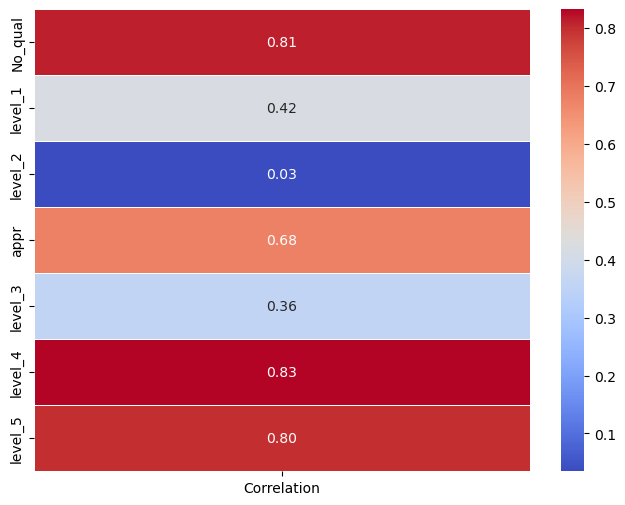

In [78]:
import seaborn as sns
import matplotlib.pylab as plt

# Create a DataFrame for the correlation values
corr_df = pd.DataFrame(correlation_values, index=hle, columns=["Correlation"])

# Display the DataFrame
print(corr_df)

# Display a heatmap of the DataFrame
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True, fmt=".2f", linewidths=.5, cmap='coolwarm')

plt.show()

In [54]:
merged_df2.to_csv('/Users/loucap/Documents/GitWork/InteractiveGender/Data/cleaned_HLE.csv')